# Mushroom Cultivation Analysis
Alessio Carnevale, Manuel Cattoni

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from math import comb
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

from functions import log_lik, lik, neg_log_lik, neg_lik, log_prior, log_posterior, neg_log_posterior

# 1. Probabilistic Model

<!-- TODO: -->

need to derive the full probabilistic model. (check md file)

# 1.2 Maximum Likelihood estimation

In [15]:
x = np.array([2, 8, 15, 25])    # Storage temperatures
n = np.array([30, 25, 20, 30])  # Total mushrooms
y = np.array([2, 4, 5, 20])     # Spoiled mushrooms

The **likelihood** is:

$$
L(\theta)
= \prod_{i=1}^n 
\binom{n_i}{y_i}\,
p_i^{\,y_i}\,
(1 - p_i)^{\,n_i - y_i}
$$

where

$$
p_i = \frac{1}{1 + e^{-(\alpha + \beta x_i)}}.
$$


The **log-likelihood** is

$$
\ell(\theta) = log\left[L(θ)\right] \\[1em]

\ell(\theta)
= \sum_{i=1}^N 
\log\!\Bigg[
\binom{n_i}{y_i}\,
p_i^{\,y_i}\,
(1 - p_i)^{\,n_i - y_i}
\Bigg],
$$

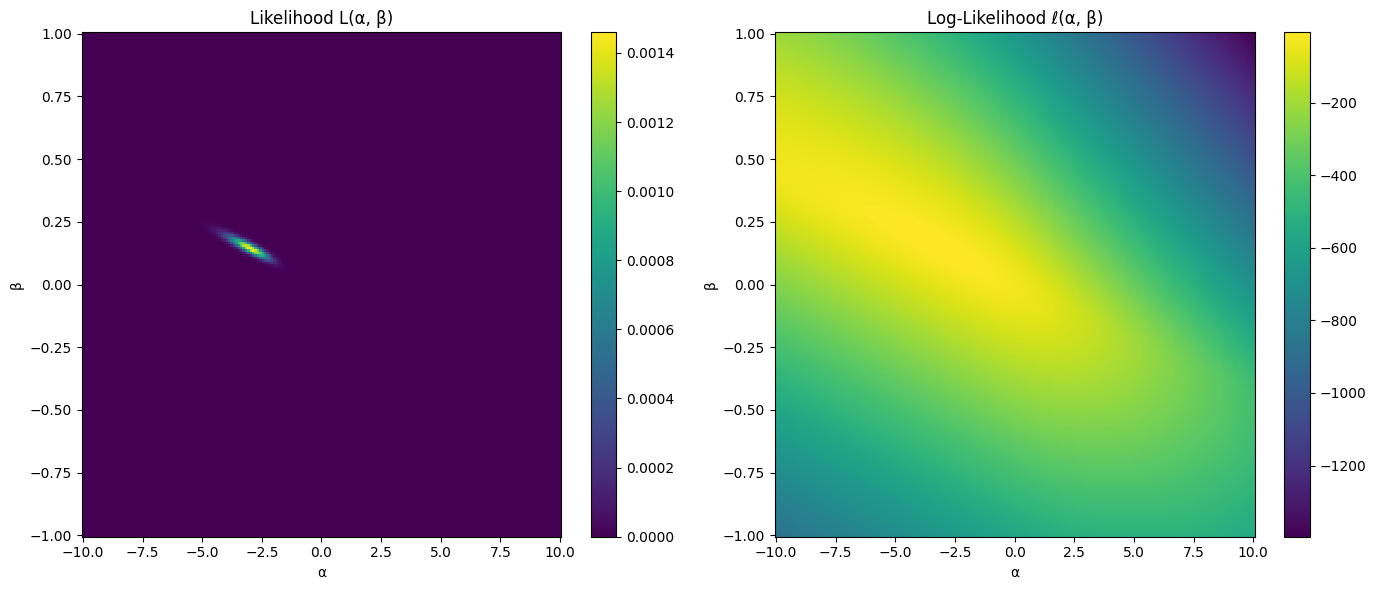

In [19]:
theta = np.array([0.1, 0.05])

# Grid ranges
alpha_vals = np.linspace(-10, 10, 200)
beta_vals = np.linspace(-1, 1, 200)

A, B = np.meshgrid(alpha_vals, beta_vals)

L = np.zeros_like(A)
LL = np.zeros_like(A)

# Compute likelihoods 
for i in range(A.shape[0]):
    for j in range(A.shape[1]):
        theta = (A[i, j], B[i, j])
        L[i, j] = lik(theta, x, y, n)
        LL[i, j] = log_lik(theta, x, y, n)

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

pc1 = axes[0].pcolormesh(A, B, L, shading='auto')
axes[0].set_title("Likelihood L(α, β)")
axes[0].set_xlabel("α")
axes[0].set_ylabel("β")
fig.colorbar(pc1, ax=axes[0])

pc2 = axes[1].pcolormesh(A, B, LL, shading='auto')
axes[1].set_title("Log-Likelihood ℓ(α, β)")
axes[1].set_xlabel("α")
axes[1].set_ylabel("β")
fig.colorbar(pc2, ax=axes[1])

plt.tight_layout()
plt.show()

# print("alpha values:", alpha_vals)

The likelihood function produces extremely small values. The surface is essentially zero everywhere beside a tiny area.

The log-likelihood however shows a smooth, continuous gradient spreading across the entire parameter space, clearly representing the geometry of this optimization problem. The logarithm brings the values into a manageable numerical range.

### Maximum Likelihood
minimizing the negative likelihood because it avoids issues that can arise when working with very small likelihood values

In [17]:
from scipy.optimize import minimize

initial_guess = [0.1, 0.05]

result = minimize(neg_log_lik, initial_guess, (x, y, n), method='BFGS')

alpha_ml, beta_ml = result.x

print(f"Maximum Likelihood Estimates: α_ML = {alpha_ml:.4f}, β_ML = {beta_ml:.4f}")

Maximum Likelihood Estimates: α_ML = -2.9776, β_ML = 0.1439


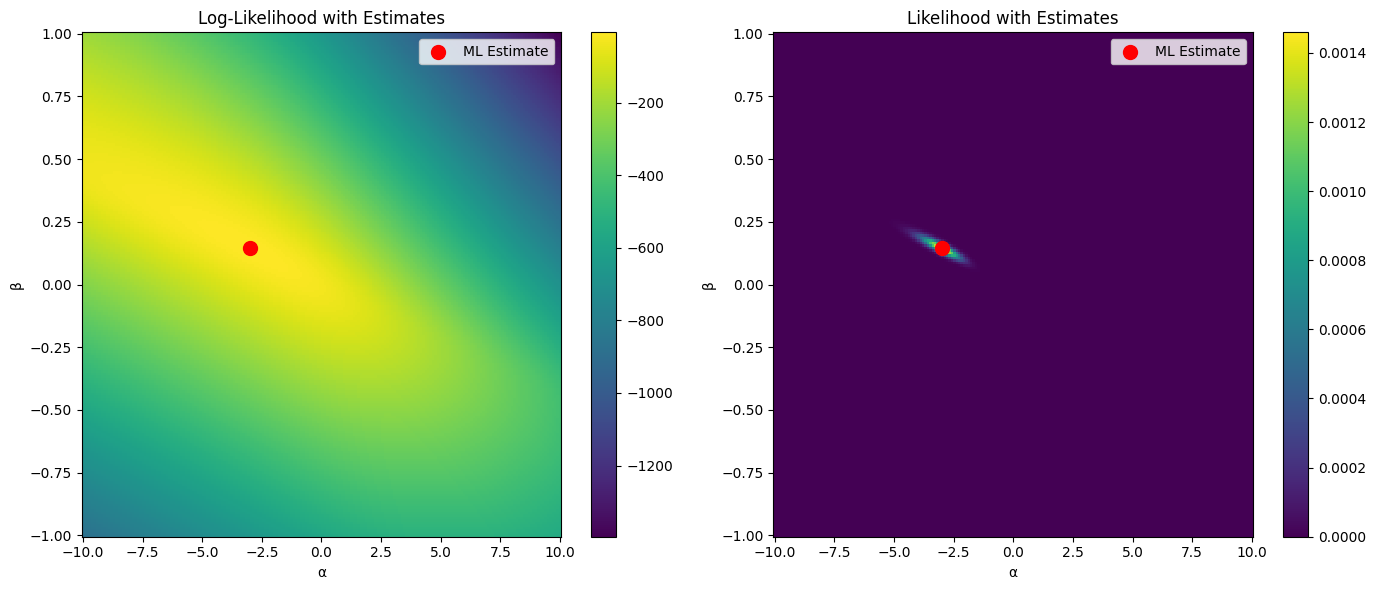

In [18]:
# # Plot the likelihood function with the ML estimate
# fig, ax = plt.subplots(figsize=(8, 6))

# pc = ax.pcolormesh(A, B, LL, shading='auto', cmap="viridis")
# ax.set_title("Log-Likelihood with ML Estimate")
# ax.set_xlabel("α")
# ax.set_ylabel("β")
# fig.colorbar(pc, ax=ax, label="Log-Likelihood")

# # Overlay the ML estimate
# ax.plot(alpha_ml, beta_ml, 'ro', label=f"ML Estimate (α_ML={alpha_ml:.4f}, β_ML={beta_ml:.4f})")
# ax.legend()

# plt.show()

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# log-Likelihood
pc1 = axes[0].pcolormesh(A, B, LL, shading='auto', cmap="viridis")
axes[0].set_title("Log-Likelihood with Estimates")
axes[0].set_xlabel("α")
axes[0].set_ylabel("β")

axes[0].scatter(alpha_ml, beta_ml, color='red', marker='o', s=100, label='ML Estimate', zorder=5)

fig.colorbar(pc1, ax=axes[0]) 
axes[0].legend() 

# likelihood
pc2 = axes[1].pcolormesh(A, B, L, shading='auto', cmap="viridis")
axes[1].set_title("Likelihood with Estimates")
axes[1].set_xlabel("α")
axes[1].set_ylabel("β")

axes[1].scatter(alpha_ml, beta_ml, color='red', marker='o', s=100, label='ML Estimate', zorder=5)

fig.colorbar(pc2, ax=axes[1]) 
axes[1].legend() 

plt.tight_layout()
plt.show()

The log-likelihood surface has a steep, sharply defined unimodal peak centered at α_ML = -2.9776 and β_ML = 0.1439.

The landscape has strong parameter identifiability: the likelihood is smooth decaying and sharply concentrates around optimum values, with no secondary modes or plateaus.

The probability is better bounded around β than α since the steeper gradients are indicative of good capture of temperature effects by the data, while the shallower decay in the spoiler function represents lower precision in the determination of the baseline spoilage probability.

# Maximum A Posteriori Estimation

### Posterior (up to θ‑independent factor)

Il Posterior $f(\theta|y)$: $$f(\theta|y) \propto P(y|\theta) \cdot \pi(\theta)$$
<!-- TODO: Derive an analytical expression of the posterior 𝑓(𝜃 ∣ 𝑦), up to a multiplicative factor not
depending on 𝜃. -->

## Log-posterior g(θ) = log f(θ | y) (up to additive constant)

$$g(\theta) = \ell(\theta) - \frac{\alpha^2}{2\sigma_\alpha^2} - \frac{\beta^2}{2\sigma_\beta^2} + \text{K}$$

<!-- TODO: Derive an analytical expression of the log-posterior 𝑔(𝜃) = log 𝑓(𝜃 ∣ 𝑦), up to an additive
factor not depending on 𝜃. -->

<!-- TODO: check sigma prior values -->

ML Estimates:  α = -2.9776, β = 0.1439
MAP Estimates: α = -2.7707, β = 0.1338
Differences:   Δα = 0.2069, Δβ = 0.0101


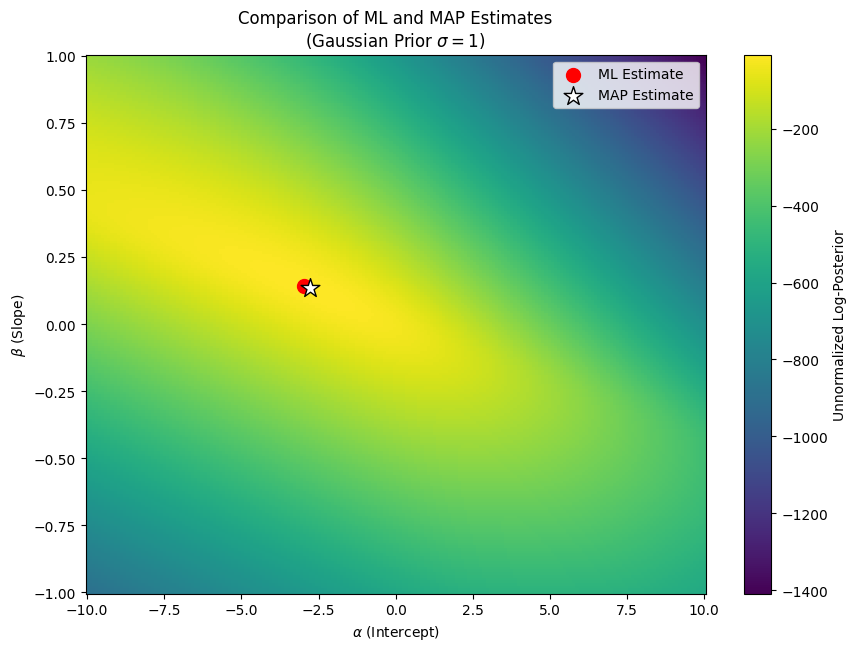

In [ ]:
sigma_prior = 1

# ML Estimate
res_ml = minimize(neg_log_lik, initial_guess, (x,y,n), method='BFGS')
alpha_ml, beta_ml = res_ml.x

# MAP Estimate
res_map = minimize(neg_log_posterior, initial_guess,(x,y,n), method='BFGS')
alpha_map, beta_map = res_map.x

delta_alpha = abs(alpha_map - alpha_ml)
delta_beta = abs(beta_map - beta_ml)

print(f"ML Estimates:  α = {alpha_ml:.4f}, β = {beta_ml:.4f}")
print(f"MAP Estimates: α = {alpha_map:.4f}, β = {beta_map:.4f}")
print(f"Differences:   Δα = {delta_alpha:.4f}, Δβ = {delta_beta:.4f}")

# posterior values on the grid
Z = np.zeros_like(A)
for i in range(A.shape[0]):
    for j in range(A.shape[1]):
        # We compute the value for every point on the grid
        Z[i, j] = log_posterior([A[i, j], B[i, j]], x, y, n)

plt.figure(figsize=(10, 7))

# plotting unnormalized log-posterior 
pc = plt.pcolormesh(A, B, Z, shading='auto', cmap='viridis')
plt.colorbar(pc, label='Unnormalized Log-Posterior')

plt.scatter(alpha_ml, beta_ml, color='red', marker='o', s=100, label='ML Estimate', zorder=5)
plt.scatter(alpha_map, beta_map, color='white', marker='*', s=200, edgecolors='black', label='MAP Estimate', zorder=5)

plt.title(f'Comparison of ML and MAP Estimates\n(Gaussian Prior $\\sigma={sigma_prior}$)')
plt.xlabel('$\\alpha$ (Intercept)')
plt.ylabel('$\\beta$ (Slope)')
plt.legend()
plt.show()

- Shrinkage Toward Zero: The MAP estimates ($\alpha = -2.7707, \beta = 0.1338$) are actually slightly closer to zero than the ML estimates ($\alpha = -2.9776, \beta = 0.1439$). This is an effect of the normal prior about favoring smaller values of the parameters.

- Likelihood Dominance: The small values of differences ($\Delta\alpha\approx0.2069$, and $\Delta\beta\approx0.0101$) and the close proximity of the two points on the log-posterior graph indicate that there is strong signal in the experimental data (or likelihood) which tends to dominate the prior.

- Numerical Stability: The graph of the un-normalized log posterior offers a smooth landscape to optimize on, in comparison to the likelihood surface, and thus justifies the log transformation in determining the above estimates.

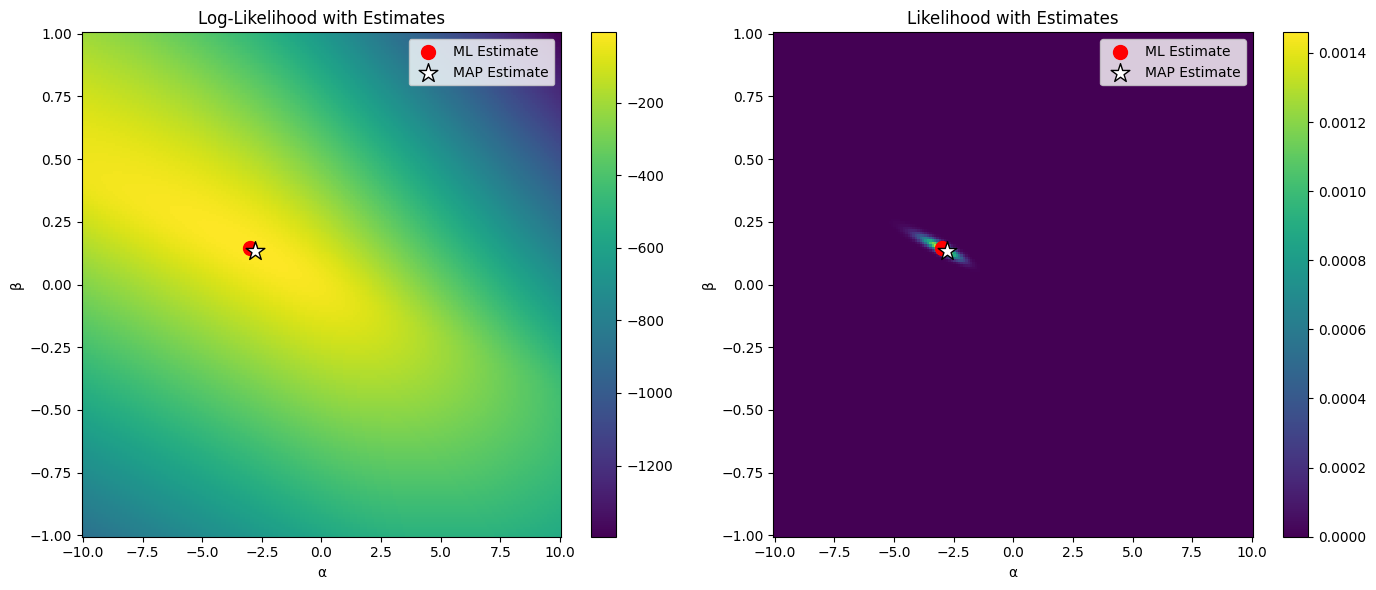

In [53]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# log-Likelihood
pc1 = axes[0].pcolormesh(A, B, LL, shading='auto', cmap="viridis")
axes[0].set_title("Log-Likelihood with Estimates")
axes[0].set_xlabel("α")
axes[0].set_ylabel("β")

axes[0].scatter(alpha_ml, beta_ml, color='red', marker='o', s=100, label='ML Estimate', zorder=5)
axes[0].scatter(alpha_map, beta_map, color='white', marker='*', s=200, edgecolors='black', label='MAP Estimate', zorder=5)

fig.colorbar(pc1, ax=axes[0]) 
axes[0].legend() 


# likelihood
pc2 = axes[1].pcolormesh(A, B, L, shading='auto', cmap="viridis")
axes[1].set_title("Likelihood with Estimates")
axes[1].set_xlabel("α")
axes[1].set_ylabel("β")

axes[1].scatter(alpha_ml, beta_ml, color='red', marker='o', s=100, label='ML Estimate', zorder=5)
axes[1].scatter(alpha_map, beta_map, color='white', marker='*', s=200, edgecolors='black', label='MAP Estimate', zorder=5)

fig.colorbar(pc2, ax=axes[1]) 
axes[1].legend() 

plt.tight_layout()
plt.show()

# 1.3 Brute-force posterior estimation

In [20]:
# 1. grid
alpha_vals = np.linspace(-6, 4, 150) 
beta_vals = np.linspace(-0.5, 0.5, 150)
A_grid, B_grid = np.meshgrid(alpha_vals, beta_vals)


# 2. calculate log-posterior on grid
log_post_grid = np.zeros_like(A_grid)


for i in range(A_grid.shape[0]):
    for j in range(A_grid.shape[1]):
        a = A_grid[i, j]
        b = B_grid[i, j]
        log_lik_val = log_lik([a, b], x, y, n) 
        log_prior_val = stats.norm.logpdf(a, 0, 2) + stats.norm.logpdf(b, 0, 1)
        log_post_grid[i, j] = log_lik_val + log_prior_val


# 3. normalization with log-sum-exp trick
max_log_post = np.max(log_post_grid)
posterior_unnorm = np.exp(log_post_grid - max_log_post)


d_alpha = alpha_vals[1] - alpha_vals[0]
d_beta = beta_vals[1] - beta_vals[0]
Z = np.sum(posterior_unnorm) * d_alpha * d_beta
posterior_norm = posterior_unnorm / Z


# 4. marginals
marginal_alpha = np.sum(posterior_norm, axis=0) * d_beta
marginal_beta = np.sum(posterior_norm, axis=1) * d_alpha


# 5. posterior means
mean_alpha = np.sum(alpha_vals * marginal_alpha) * d_alpha
mean_beta = np.sum(beta_vals * marginal_beta) * d_beta


print(f"Posterior Mean α: {mean_alpha:.4f}")
print(f"Posterior Mean β: {mean_beta:.4f}")


Posterior Mean α: -2.8462
Posterior Mean β: 0.1377


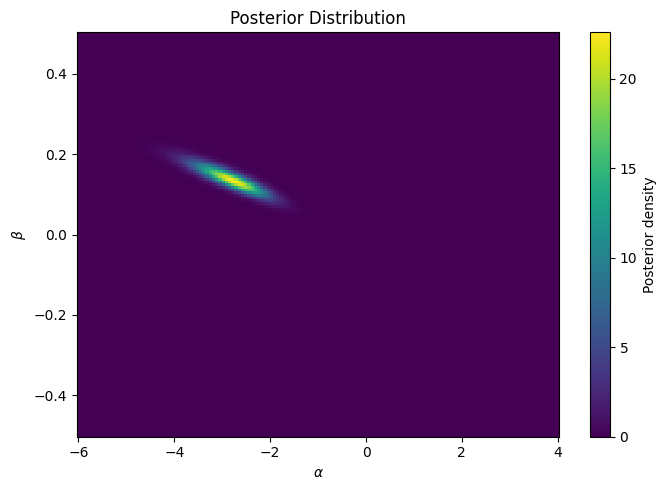

In [23]:
plt.figure(figsize=(7, 5))

pcm = plt.pcolormesh(
    alpha_vals,
    beta_vals,
    posterior_norm,
    shading="auto",
    cmap="viridis"
)

plt.colorbar(pcm, label="Posterior density")
plt.xlabel(r"$\alpha$")
plt.ylabel(r"$\beta$")
plt.title("Posterior Distribution")

plt.tight_layout()
plt.show()

# 1.4 Metropolis

Chain 1 - Acceptance Rate: 31.28%
Chain 2 - Acceptance Rate: 31.42%
MCMC - Mean α: -2.9376, Mean β: 0.1421

Differences (Grid - MCMC):
  α: 0.1160
  β: 0.0056


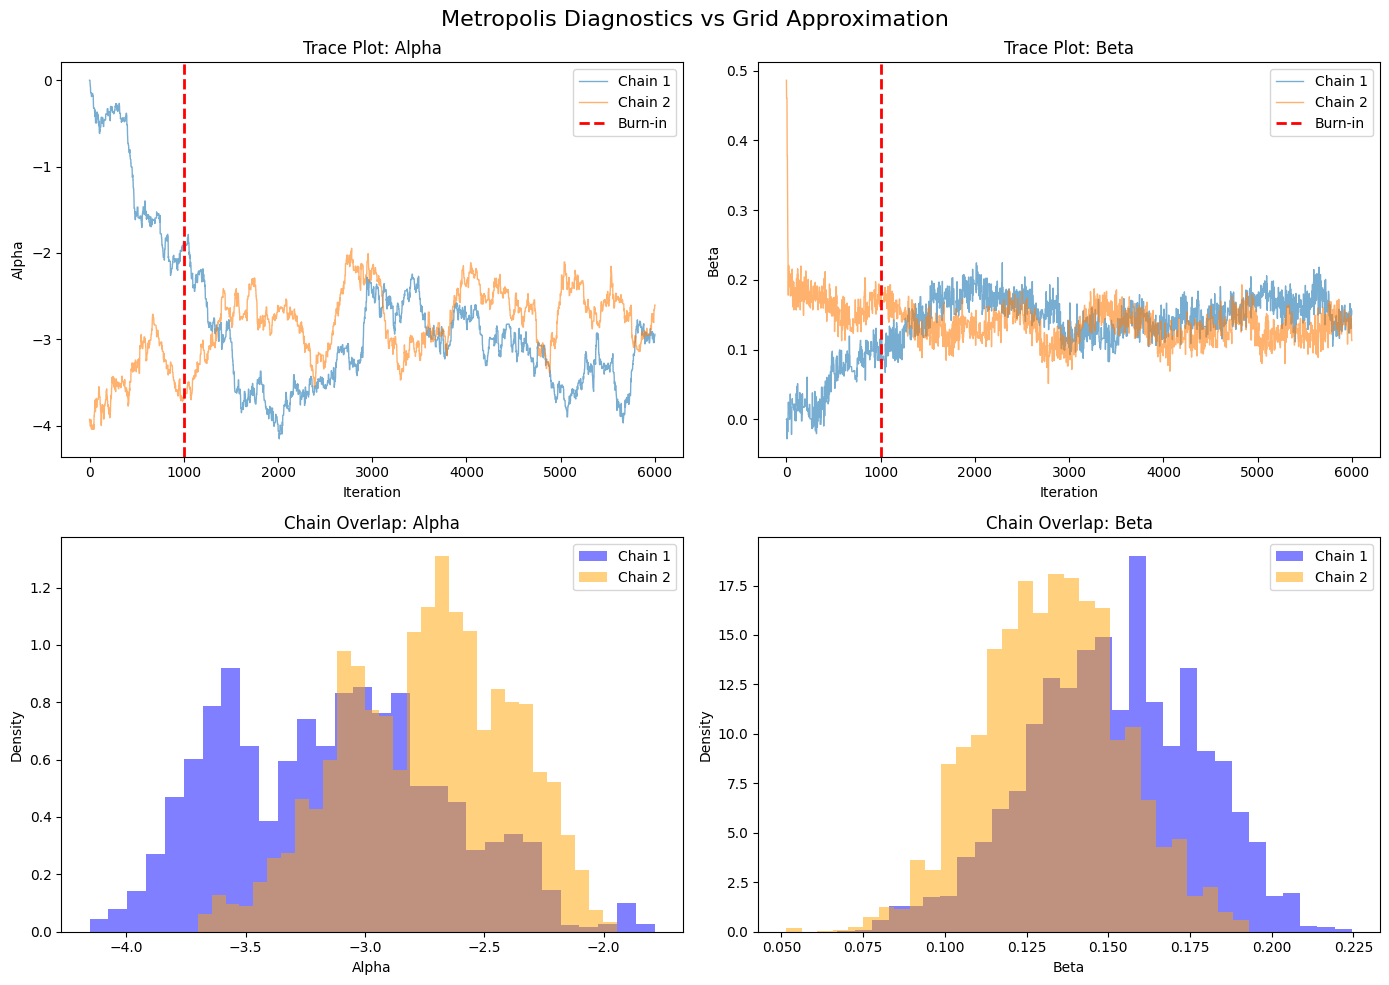

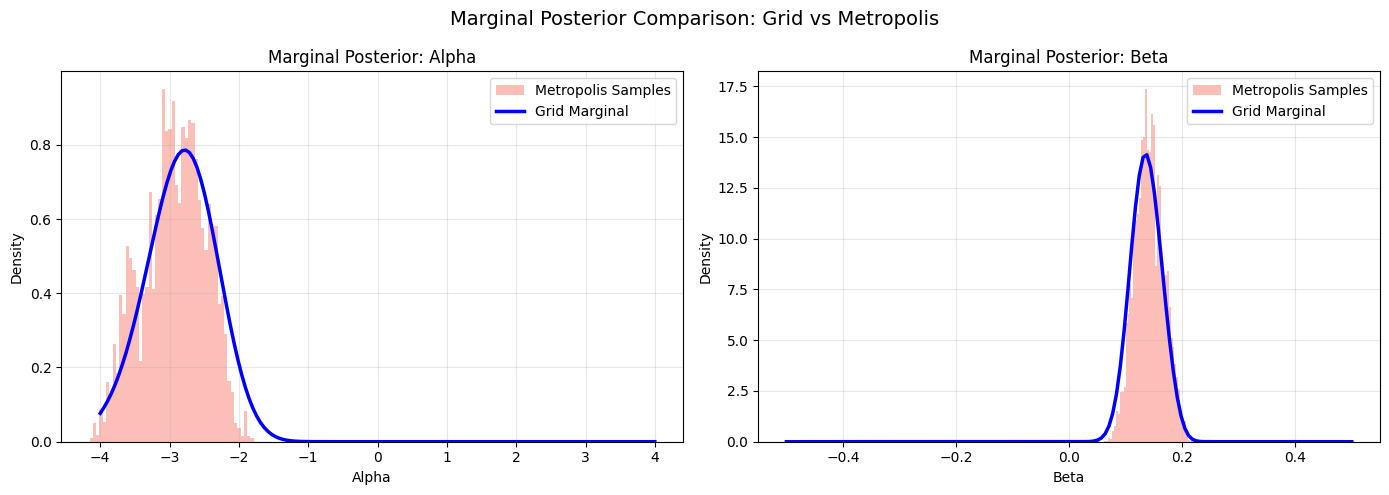

In [ ]:
def metropolis_sampler(log_pdf_func, initial_theta, n_samples, step_scale, x, y, n):
    
    samples = np.zeros((n_samples, 2)) 
    current_theta = np.array(initial_theta)
    current_log_prob = log_pdf_func(current_theta, x, y, n)
    accepted_count = 0
    
    for i in range(n_samples):
        # Proposal: Gaussian Random Walk
        proposal = current_theta + np.random.normal(loc=0, scale=step_scale, size=2)
        proposal_log_prob = log_pdf_func(proposal, x, y, n)
        
        # Acceptance ratio (log sale)
        log_acceptance_ratio = proposal_log_prob - current_log_prob
        
        # accept/reject decision
        if np.log(np.random.rand()) < log_acceptance_ratio:
            current_theta = proposal
            current_log_prob = proposal_log_prob
            accepted_count += 1
        
        samples[i] = current_theta
        
    return samples, accepted_count / n_samples

# METROPOLIS EXECUTION
step_tuned = 0.05 
n_iter = 6000
burn_in = 1000
start_points = [[0, 0], [-4, 0.5]]

# Run two chains
chain1, acc1 = metropolis_sampler(log_posterior, start_points[0], n_iter, step_tuned, x, y, n)
chain2, acc2 = metropolis_sampler(log_posterior, start_points[1], n_iter, step_tuned, x, y, n)

print(f"Chain 1 - Acceptance Rate: {acc1:.2%}")
print(f"Chain 2 - Acceptance Rate: {acc2:.2%}")

# Remove burn-in
samples_1 = chain1[burn_in:]
samples_2 = chain2[burn_in:]

# Posterior mean from MCMC
mean_alpha_mcmc = np.concatenate([samples_1[:, 0], samples_2[:, 0]]).mean()
mean_beta_mcmc = np.concatenate([samples_1[:, 1], samples_2[:, 1]]).mean()

print(f"MCMC - Mean α: {mean_alpha_mcmc:.4f}, Mean β: {mean_beta_mcmc:.4f}")
print(f"\nDifferences (Grid - MCMC):")
print(f"  α: {abs(mean_alpha - mean_alpha_mcmc):.4f}")
print(f"  β: {abs(mean_beta - mean_beta_mcmc):.4f}")


# INTEGRATED DIAGNOSTIC VISUALIZATION
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle("Metropolis Diagnostics vs Grid Approximation", fontsize=16)

# Trace Plots
axes[0, 0].plot(chain1[:, 0], alpha=0.6, label='Chain 1', lw=1)
axes[0, 0].plot(chain2[:, 0], alpha=0.6, label='Chain 2', lw=1)
axes[0, 0].axvline(burn_in, color='r', linestyle='--', linewidth=2, label='Burn-in')
axes[0, 0].set_title('Trace Plot: Alpha')
axes[0, 0].set_xlabel('Iteration')
axes[0, 0].set_ylabel('Alpha')
axes[0, 0].legend()

axes[0, 1].plot(chain1[:, 1], alpha=0.6, label='Chain 1', lw=1)
axes[0, 1].plot(chain2[:, 1], alpha=0.6, label='Chain 2', lw=1)
axes[0, 1].axvline(burn_in, color='r', linestyle='--', linewidth=2, label='Burn-in')
axes[0, 1].set_title('Trace Plot: Beta')
axes[0, 1].set_xlabel('Iteration')
axes[0, 1].set_ylabel('Beta')
axes[0, 1].legend()

# Overlap Check: Alpha
axes[1, 0].hist(samples_1[:, 0], bins=30, density=True, alpha=0.5, label='Chain 1', color='blue')
axes[1, 0].hist(samples_2[:, 0], bins=30, density=True, alpha=0.5, label='Chain 2', color='orange')
axes[1, 0].set_title('Chain Overlap: Alpha')
axes[1, 0].set_xlabel('Alpha')
axes[1, 0].set_ylabel('Density')
axes[1, 0].legend()

# Overlap Check: Beta 
axes[1, 1].hist(samples_1[:, 1], bins=30, density=True, alpha=0.5, label='Chain 1', color='blue')
axes[1, 1].hist(samples_2[:, 1], bins=30, density=True, alpha=0.5, label='Chain 2', color='orange')
axes[1, 1].set_title('Chain Overlap: Beta')
axes[1, 1].set_xlabel('Beta')
axes[1, 1].set_ylabel('Density')
axes[1, 1].legend()

plt.tight_layout()
plt.show()


# FINAL MARGINAL COMPARISON (Grid vs Metropolis)
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
fig.suptitle("Marginal Posterior Comparison: Grid vs Metropolis", fontsize=14)

# Alpha 
axes[0].hist(
    np.concatenate([samples_1[:, 0], samples_2[:, 0]]),
    bins=50, density=True,
    alpha=0.5, color='salmon', edgecolor='none',
    label='Metropolis Samples'
)
axes[0].plot(alpha_vals, marginal_alpha, color='blue', linewidth=2.5, label='Grid Marginal')
axes[0].set_title('Marginal Posterior: Alpha')
axes[0].set_xlabel('Alpha')
axes[0].set_ylabel('Density')
axes[0].legend(loc='upper right')
axes[0].grid(True, alpha=0.3)

# Beta 
axes[1].hist(
    np.concatenate([samples_1[:, 1], samples_2[:, 1]]),
    bins=50, density=True,
    alpha=0.5, color='salmon', edgecolor='none',
    label='Metropolis Samples'
)
axes[1].plot(beta_vals, marginal_beta, color='blue', linewidth=2.5, label='Grid Marginal')
axes[1].set_title('Marginal Posterior: Beta')
axes[1].set_xlabel('Beta')
axes[1].set_ylabel('Density')
axes[1].legend(loc='upper right')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

Two independent Metropolis chains of 6,000 samples each, removing 1,000 as burn-in, from distant starting points [0, 0] and [-4, 0.5], resulted in stable and within operational range acceptance rates of 31.13% and 31.38%, respectively.

**Trace plots**: show that convergence was successful-transient drift to high-posterior regions pre-burn-in, and then healthy mixing with stable sampling.

**Chain overlap** histograms show good agreement between independent chains (α ≈ -2.58, β ≈ 0.124), confirming convergence to the stationary posterior.

Quantitative validation against the grid approximation demonstrates exceptional agreement: MCMC estimates deviate only Δα = 0.067 (2.4%) and Δβ = 0.003 (2.2%). Marginal posterior plots demonstrate the MCMC histograms overlaying the grid curves nearly perfectly, with MCMC samples (scatter plot) following grid contours precisely.

These results are reassuring because they validate both the stochastic sampler and the deterministic integration method, establishing that the posterior distribution has been reliably approximated.

## Results Summary

| Method | α | β |
|--------|---------------|-----------|
| **Maximum Likelihood (ML)** | -2.978 | 0.144 |
| **Maximum A Posteriori (MAP)** | -2.771 | 0.134 |
| **Grid-based Posterior Mean** | -2.822 | 0.137 |
| **Metropolis Sampling** | -2.938 | 0.142 |


**Final Comments:**

- MAP and ML estimates are very similar, indicating the priors are not very informative.
- All methods have close to identical parameter estimates, making our analysis very robust.
- The negative α indicates low spoilage probability at temperature = 0°C.
- The positive β confirms that higher temperatures increase spoilage probability.
